# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Stats sur les paragraphes

---

# Observations et environnement
---

## Environnement

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

## Données

In [4]:
filename = 'data/prod/230510-OIDS-Label.csv'

In [5]:
df_label = pd.read_csv(filename)
df_label['paragraphs'] = df_label['paragraphs'].apply(ast.literal_eval)
df_label['abstract'].fillna('',inplace=True)

In [6]:
df_label['infox'].isna().sum()

36

In [7]:
df_label = df_label[df_label['infox'].notna()]

## Prédicteur

In [8]:
import patat.util.file
#predfile = 'data/tmp/230425-PredInfox.pickle'
predfile = 'data/prod/230510-LogRegInfox.pickle'
predictor = patat.util.file.pickle_load(predfile)

# Experience
---

In [13]:
text = df_label.sample(1).iloc[0]['text']

In [14]:
print(text)

Un demi-million d'Allemands ont subi de graves blessures causées par le vaccin COVID-19
De : https://www.naturalnews.com/2022-05-12-survey-finds-germans-suffered-severe-vaccine-injuries.html
Jeudi 12 mai 2022 par : Cassie B.
Une
 enquête portant sur près de 40 000 Allemands dans l'un des plus grands 
hôpitaux d'Europe a révélé un taux élevé d'effets secondaires graves des
 vaccins COVID-19 qui durent des mois, voire plus.
Parmi
 les résultats de l'étude, il y avait un taux de 8 effets secondaires 
graves pour 1 000 personnes vaccinées, soit 40 fois les 0,2 estimés par 
l'organisme allemand de surveillance des vaccins, l'Institut Paul 
Ehrlich.
Le
 chercheur principal de l'étude, le Dr Harald Matthes, estime qu'environ
 un demi-million d'Allemands ont subi de graves effets secondaires après
 avoir reçu les piqûres basées sur ces statistiques. Alors
 que 80 % des personnes ayant des réactions graves se sont rétablies en 
trois à six mois, 20 % continuent de présenter des symptômes.
En
 d

In [15]:
import numpy as np

In [16]:
df_label['predict_infox']=np.round(predictor.predict_proba(df_label['text'])[:,1],3)

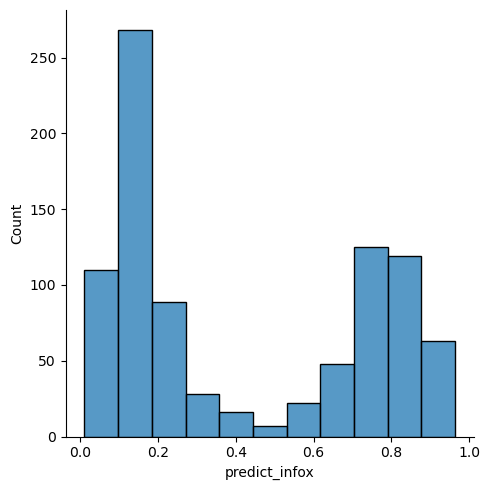

In [17]:
sns.displot(df_label,x='predict_infox')

In [18]:
df_label['predict_parags']=df_label['paragraphs'].progress_apply(lambda ps: predictor.predict_proba(ps)[:,1])


  0%|          | 0/895 [00:00<?, ?it/s]

In [21]:
from termcolor import colored

In [22]:

def print_parags(index):
    print(df_label['title'][index])
    print(f'Infox level : {df_label["predict_infox"][index]}\n')
    parags = df_label['paragraphs'][index]
    for i in range(0,len(parags)):
        proba = df_label['predict_parags'][index][i]
        if proba < .3:
            print (colored(parags[i], 'green'))
        elif proba > .7:
            print (colored(parags[i], 'red'))
        else:
            print(parags[i])
        

In [24]:
print_parags(12)

Ne vous inquiétez pas, nous ne manquerons jamais de pétrole
Infox level : 0.727

Le pétrole brut est l’une des ressources les plus importantes que nous ayons jamais découvertes. Le pétrole et les nombreux produits fabriqués à partir de celui-ci ont littéralement et figurativement transformé le monde au-delà de toute reconnaissance. Cependant, comme on nous le rappelle constamment, le pétrole brut n’est pas disponible en quantité infinie. Après tout, il a fallu des millions d’années pour le « brasser ».
Les estimations varient, mais si notre consommation actuelle se poursuit à un rythme soutenu, il se pourrait bien que, dans un avenir proche, nous soyons complètement épuisés. Mais ces affirmations sont-elles vraies ? Avons-nous atteint ce que l’on appelle communément le « pic pétrolier » ?
Ou, peut-être, juste peut-être, regardons-nous le problème sous le mauvais angle ?
Mais avant de s’interroger sur l’avenir du pétrole, prenons le temps de discuter de la nature d’une ressource « finie

## Stats Paragraphes

### Calcul des textes

In [29]:
paragraphs = df_label['paragraphs'].sum()

/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_4336/2173199030.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_label[['paragraphs','predict_parags']].sum()


paragraphs    [L’Arabie saoudite a organisé un événement pou...
dtype: object

In [30]:
predict = df_label['predict_parags'].sum()

TypeError: operands could not be broadcast together with shapes (8,) (15,) 

In [32]:
df_label.shape

(895, 45)

In [31]:
compil = []
for i in df_label.shape[0]:
    compil.append({
        'text'
    })

,paragraphs,predict_parags
0,[L’Arabie saoudite a organisé un événement pou...,"[0.1326685191263782, 0.12816675891313328, 0.17..."
1,[Une professeure de droit a partagé sur Twitte...,"[0.22197167250009972, 0.19054390055435694, 0.2..."
2,[Le gouvernement israélien a qualifié la posit...,"[0.2791761086852806, 0.04611973304498042, 0.12..."
3,[NANTES – Une enquête pour « homicide volontai...,"[0.15815738229224816, 0.18136618237091937, 0.1..."
4,[La Cour européenne des droits de l’Homme (CED...,"[0.14253450532453302, 0.16886300901548232, 0.1..."
...,...,...
895,"[Voile, femme, alimentation ou djihad… Il a ré...","[0.18556535219100584, 0.333042960579129, 0.187..."
896,[Plus de la moitié des Américains qui ont voté...,"[0.15661202652403422, 0.12687287004717515, 0.2..."
897,[La loi du 11 février 2005 prévoyait que les é...,"[0.22402715975863888, 0.21342573808474058, 0.1..."
898,[On connait la musique depuis deux ans : les h...,"[0.257502861257735, 0.314734578546719, 0.20139..."


In [33]:
df_label[['paragraphs','predict_parags']]

,paragraphs,predict_parags
0,[L’Arabie saoudite a organisé un événement pou...,"[0.1326685191263782, 0.12816675891313328, 0.17..."
1,[Une professeure de droit a partagé sur Twitte...,"[0.22197167250009972, 0.19054390055435694, 0.2..."
2,[Le gouvernement israélien a qualifié la posit...,"[0.2791761086852806, 0.04611973304498042, 0.12..."
3,[NANTES – Une enquête pour « homicide volontai...,"[0.15815738229224816, 0.18136618237091937, 0.1..."
4,[La Cour européenne des droits de l’Homme (CED...,"[0.14253450532453302, 0.16886300901548232, 0.1..."
...,...,...
895,"[Voile, femme, alimentation ou djihad… Il a ré...","[0.18556535219100584, 0.333042960579129, 0.187..."
896,[Plus de la moitié des Américains qui ont voté...,"[0.15661202652403422, 0.12687287004717515, 0.2..."
897,[La loi du 11 février 2005 prévoyait que les é...,"[0.22402715975863888, 0.21342573808474058, 0.1..."
898,[On connait la musique depuis deux ans : les h...,"[0.257502861257735, 0.314734578546719, 0.20139..."


In [39]:
def merge_predict(parags,predicts):
    parags_infox = []
    for i in range(0,len(parags)):
        parags_infox.append({
            'text': parags[i],
            'infox' : predicts[i]
        })
    return parags_infox

In [40]:
df_label['pp']=df_label[['paragraphs','predict_parags']].apply(lambda row: merge_predict(row['paragraphs'],row['predict_parags']),axis=1)







In [45]:
df_parags = pd.DataFrame(df_label['pp'].sum())

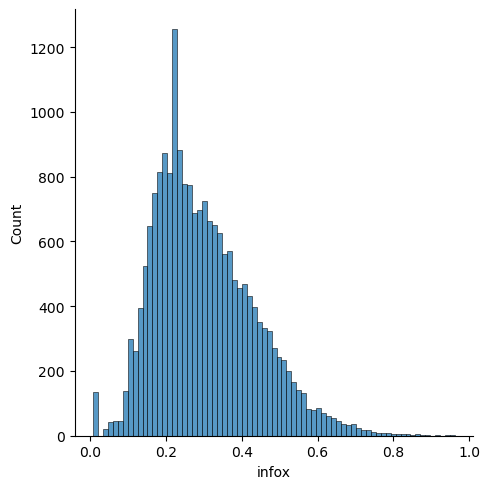

In [46]:
sns.displot(df_parags,x='infox')

In [49]:
df_parags['c_count']=df_parags['text'].apply(len)

In [56]:
df_parags.sort_values('infox',ascending=False).head(50)

,text,infox,c_count
15444,Après\n avoir nié l'existence de laboratoires ...,0.962866,8072
7305,Le\n rêve de Bill Gates de contrôler la planèt...,0.951398,20846
7209,Une\n vidéo époustouflante de médecins canadie...,0.940364,7982
15723,Par Prof Michel Chossudovsky et Caroline Maill...,0.921018,5506
7519,mercredi 18 mai 2022 par : Arsenio ToledoLes ...,0.913142,7524
18148,(Publié par Nicole Delépine) 2022-02-15 Chaque...,0.892535,10888
19664,Amy Mek\n\n\n22 mars 2022\nL'Ukraine transfère...,0.878844,14013
7982,Catherine Watt 19 septembre 2022Dans\n le cadr...,0.875612,9038
16676,Fort\n Bragg a perdu plus de 80 soldats de cau...,0.873816,6404
15457,Il\n est également difficile de croire le gouv...,0.869463,792


In [53]:
df_parags['c_count'].describe()

count     20024.000000
mean        321.902167
std        1374.161987
min           1.000000
25%         105.000000
50%         233.000000
75%         397.000000
max      178207.000000
Name: c_count, dtype: float64

In [90]:
df = df_parags[df_parags['c_count']<5000]

In [91]:
df = df[df['c_count']>500]

<AxesSubplot: xlabel='infox', ylabel='c_count'>

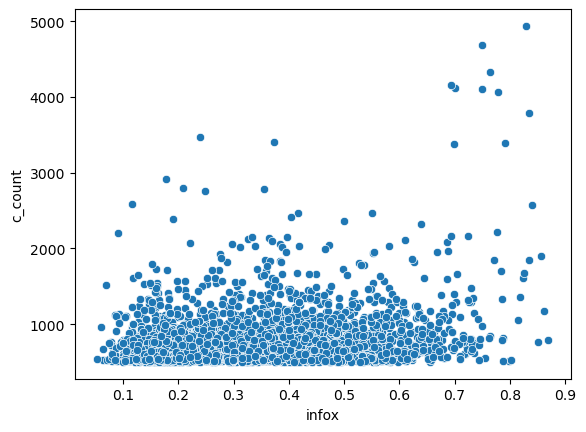

In [92]:
sns.scatterplot(df,x='infox',y='c_count')

<AxesSubplot: xlabel='infox', ylabel='Count'>

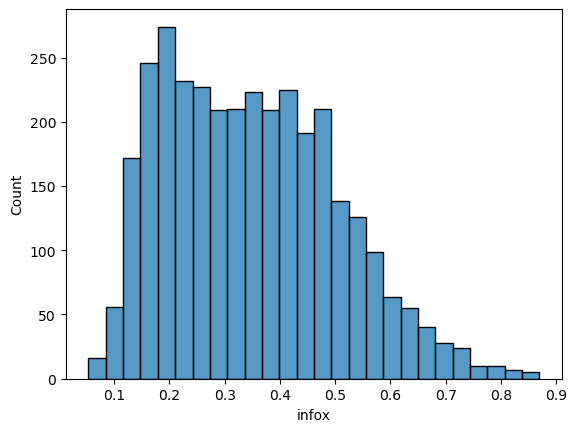

In [93]:
sns.histplot(df,x='infox')

# Sauvegarde des résultats
---

In [ ]:
df_corpus['predict_parags_json']=df_corpus['predict_parags'].apply(lambda x: json.dumps(list(x)))

In [ ]:
df_corpus = df_corpus.drop(columns=['text'])

In [ ]:
corpus_filename = 'data/prod/230510-OIDS-Corpus.csv'

In [ ]:
df_corpus.to_csv(corpus_filename)

# Conclusions
---

# Bricolages
---

In [ ]:
round(df_corpus['predict_infox'][0],3)

In [ ]:
df_corpus